In [1]:
import time  
import numpy as np  
import matplotlib.pyplot as plt  
import matplotlib as mpl
from sklearn.cluster import MiniBatchKMeans, KMeans  
from sklearn.metrics.pairwise import pairwise_distances_argmin  
from sklearn.datasets.samples_generator import make_blobs  

In [2]:
## 设置属性防止中文乱码
mpl.rcParams['font.sans-serif'] = [u'SimHei']
mpl.rcParams['axes.unicode_minus'] = False

In [3]:
#初始化三个中心
centers = [[1, 1], [-1, -1], [1, -1]] 
clusters = len(centers)  #聚类的数目为3    
#产生3000组二维的数据，中心是意思三个中心点，标准差是.7
X, Y = make_blobs(n_samples=3000, centers=centers, cluster_std=0.7, random_state=28)  

In [5]:
#构建kmeans算法
k_means = KMeans(init='k-means++', n_clusters=clusters, random_state=28)
t0 = time.time() #当前时间
k_means.fit(X)  #训练模型
km_batch = time.time() - t0  #使用kmeans训练数据的消耗时间
print ("K-Means算法模型训练消耗时间:%.4fs" % km_batch)

K-Means算法模型训练消耗时间:0.0941s


In [7]:
#构建MiniBatchKMeans算法
batch_size = 100
mbk = MiniBatchKMeans(init='k-means++', n_clusters=clusters, batch_size=batch_size, random_state=28)  
t0 = time.time()  
mbk.fit(X)  
mbk_batch = time.time() - t0  
print ("Mini Batch K-Means算法模型训练消耗时间:%.4fs" % mbk_batch)

Mini Batch K-Means算法模型训练消耗时间:0.0310s


In [8]:
#预测结果
km_y_hat = k_means.predict(X)
mbkm_y_hat = mbk.predict(X)

In [11]:
##获取聚类中心点并聚类中心点进行排序
k_means_cluster_centers = k_means.cluster_centers_
mbk_means_cluster_centers = mbk.cluster_centers_
print ("K-Means算法聚类中心点:\ncenter=", k_means_cluster_centers)
print ("Mini Batch K-Means算法聚类中心点:\ncenter=", mbk_means_cluster_centers)
order = pairwise_distances_argmin(k_means_cluster_centers,  
                                  mbk_means_cluster_centers) 
#方便后面画图

K-Means算法聚类中心点:
center= [[-1.0600799  -1.05662982]
 [ 1.02975208 -1.07435837]
 [ 1.01491055  1.02216649]]
Mini Batch K-Means算法聚类中心点:
center= [[ 0.99602094  1.10688195]
 [-1.00828286 -1.05983915]
 [ 1.07892315 -0.94286826]]


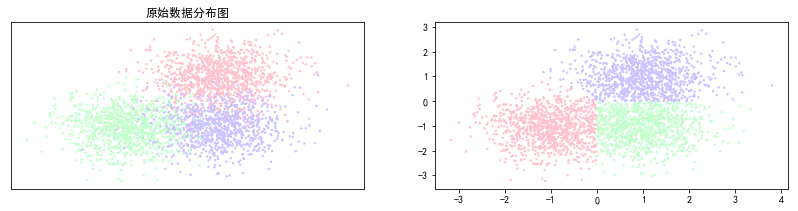

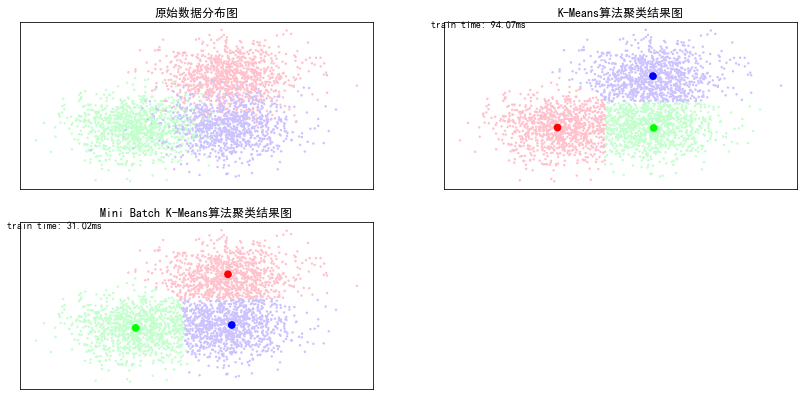

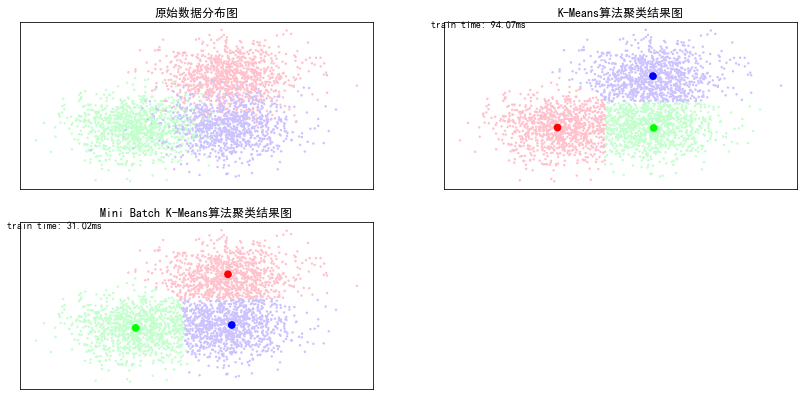

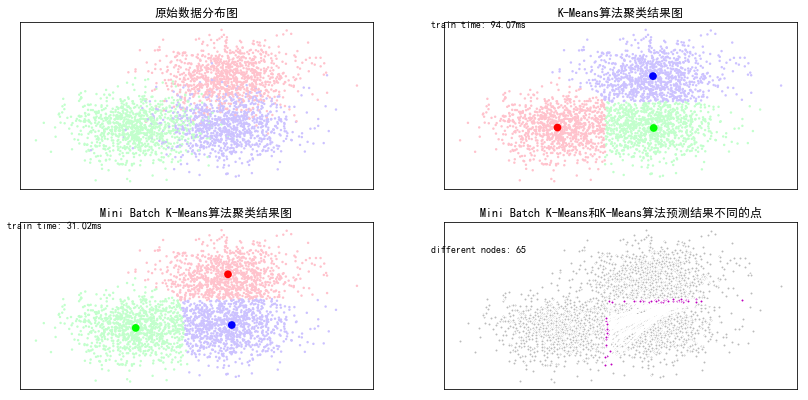

In [14]:
## 画图
plt.figure(figsize=(12, 6), facecolor='w')
plt.subplots_adjust(left=0.05, right=0.95, bottom=0.05, top=0.9)
cm = mpl.colors.ListedColormap(['#FFC2CC', '#C2FFCC', '#CCC2FF'])
cm2 = mpl.colors.ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
#子图1：原始数据
plt.subplot(221)
plt.scatter(X[:, 0], X[:, 1], c=Y, s=6, cmap=cm, edgecolors='none')
plt.title(u'原始数据分布图')
plt.xticks(())
plt.yticks(())
plt.grid(True)
#子图2：K-Means算法聚类结果图
plt.subplot(222)
plt.scatter(X[:,0], X[:,1], c=km_y_hat, s=6, cmap=cm,edgecolors='none')
plt.scatter(k_means_cluster_centers[:,0], k_means_cluster_centers[:,1],c=range(clusters),s=60,cmap=cm2,edgecolors='none')
plt.title(u'K-Means算法聚类结果图')
plt.xticks(())
plt.yticks(())
plt.text(-3.8, 3,  'train time: %.2fms' % (km_batch*1000))  
plt.grid(True)
#子图三Mini Batch K-Means算法聚类结果图
plt.subplot(223)
plt.scatter(X[:,0], X[:,1], c=mbkm_y_hat, s=6, cmap=cm,edgecolors='none')
plt.scatter(mbk_means_cluster_centers[:,0], mbk_means_cluster_centers[:,1],c=range(clusters),s=60,cmap=cm2,edgecolors='none')
plt.title(u'Mini Batch K-Means算法聚类结果图')
plt.xticks(())
plt.yticks(())
plt.text(-3.8, 3,  'train time: %.2fms' % (mbk_batch*1000))  
plt.grid(True)
#
different = list(map(lambda x: (x!=0) & (x!=1) & (x!=2), mbkm_y_hat))
for k in range(clusters):  
    different += ((km_y_hat == k) != (mbkm_y_hat == order[k]))
identic = np.logical_not(different)
different_nodes = len(list(filter(lambda x:x, different)))

plt.subplot(224)
plt.plot(X[identic, 0], X[identic, 1], 'w', markerfacecolor='#bbbbbb', marker='.')  
plt.plot(X[different, 0], X[different, 1], 'w', markerfacecolor='m', marker='.')  
plt.title(u'Mini Batch K-Means和K-Means算法预测结果不同的点')  
plt.xticks(())  
plt.yticks(())
plt.text(-3.8, 2,  'different nodes: %d' % (different_nodes))  

plt.show()